In [132]:
library(ggplot2)
library(dplyr)
library(reshape2)
path_fig = ''
path_data = ''

In [149]:
df = read.table(paste0(path_data, 'interaction_distances_HES3.tsv'), 
                sep='\t', header = TRUE)

melted_df <- melt(df[,c('X', 'X0', 'X1')], id.vars = "X", variable.name = "Morphogen", value.name = "Value")
melted_df <- melted_df %>%
 mutate(Value = log2(Value+1))%>%
 
  mutate(Value = ifelse(Morphogen == "X1",
                                 Value,
                                 -1*Value))

melted_df$MG1 <- sapply(strsplit(as.character(melted_df$X), "_"), function(x) paste(x[1:(length(x)-2)], collapse = "_"))
melted_df$MG2 <- sapply(strsplit(as.character(melted_df$X), "_"), function(x) paste(x[(length(x)-1):length(x)], collapse = "_"))

head(melted_df)

,X,Morphogen,Value,MG1,MG2
,<chr>,<fct>,<dbl>,<chr>,<chr>
1,XAV939_E_SHH_A,X0,-4.768357,XAV939_E,SHH_A
2,XAV939_E_SHH_E,X0,-5.872406,XAV939_E,SHH_E
3,XAV939_A_SHH_E,X0,-4.448376,XAV939_A,SHH_E
4,XAV939_A_SHH_A,X0,-1.277420,XAV939_A,SHH_A
5,RA_E_SHH_E,X0,-5.323487,RA_E,SHH_E
6,RA_E_SHH_A,X0,-5.360249,RA_E,SHH_A


Saving 6.67 x 6.67 in image


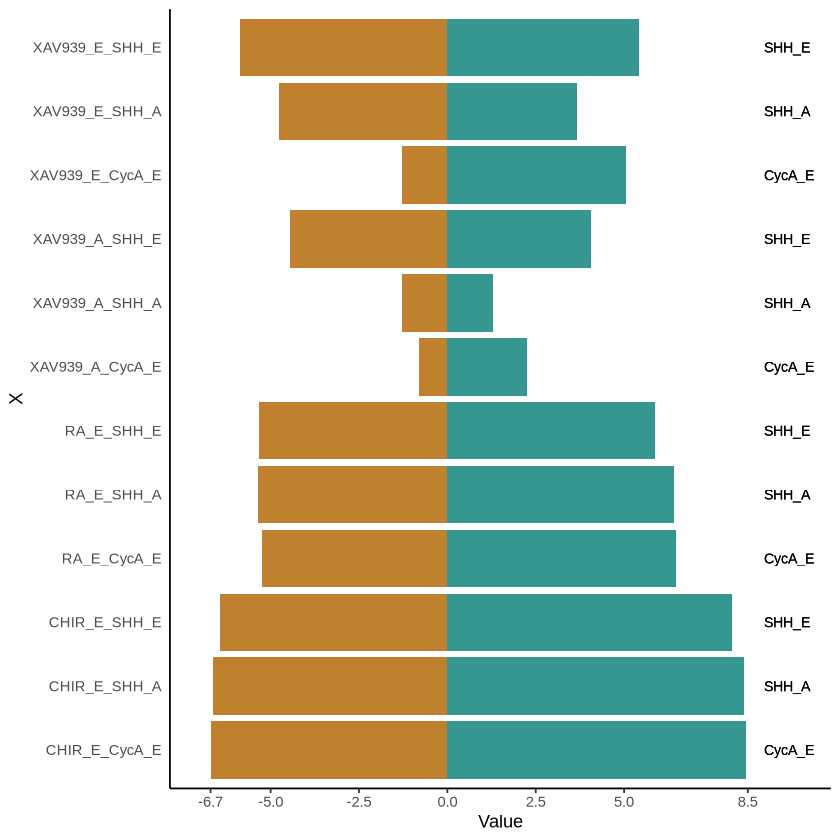

In [155]:
# Fig. 3d

# Plot with custom labels on both sides
melted_df %>%
  ggplot(aes(x = Value, y = X, fill = Morphogen)) +
  geom_bar(stat = "identity") +
  #scale_y_discrete(labels  function(x) {data.table::tstrsplit(x, "-")[[1]]}) +  # Custom left-side labels
  geom_text(
    aes(label = MG2, y = X, x = max(Value) + 0.5),  # Specify both y and x for position
    hjust = 0, size = 3,
    inherit.aes = FALSE  # Don't inherit aesthetics from ggplot
  ) +
  coord_cartesian(clip = "off") +  # Allow labels outside plot area
  theme(
    plot.margin = margin(5, 150, 5, 5),  # Add space for right labels
    axis.title.y = element_blank(),  # Optional: Remove y-axis title
  
  )+ theme_classic()+ 

  scale_x_continuous(breaks=c(-6.7, -5,-2.5, 0, 2.5, 5,8.5), limits=c(-7,10) )+
  
theme(
      
      
      axis.ticks.y=element_blank(),
legend.position="none") +
  scale_fill_manual(values = c("#bf812d", "#35978f"))
  
ggsave(paste0(path_fig, 'HES3_distances_div_barplot.pdf'))
       

## WTC

In [156]:
df = read.table(paste0(path_data, 'interaction_distances_WTC.tsv'), 
                sep='\t', header = TRUE)


melted_df <- melt(df[,c('X', 'X0', 'X1')], id.vars = "X", variable.name = "Morphogen", value.name = "Value")

melted_df <- melted_df %>%
 mutate(Value = log2(Value+1))%>%
 
  mutate(Value = ifelse(Morphogen == "X1",
                                 Value,
                                 -1*Value))


melted_df$MG1 <- sapply(strsplit(as.character(melted_df$X), "_"), function(x) paste(x[1:(length(x)-2)], collapse = "_"))
melted_df$MG2 <- sapply(strsplit(as.character(melted_df$X), "_"), function(x) paste(x[(length(x)-1):length(x)], collapse = "_"))

head(melted_df)

,X,Morphogen,Value,MG1,MG2
,<chr>,<fct>,<dbl>,<chr>,<chr>
1,XAV939_A_SHH_E,X0,-4.6198835,XAV939_A,SHH_E
2,XAV939_E_SHH_E,X0,-4.1978681,XAV939_E,SHH_E
3,XAV939_E_SHH_A,X0,-1.5341049,XAV939_E,SHH_A
4,XAV939_A_SHH_A,X0,-1.2463092,XAV939_A,SHH_A
5,RA_E_SHH_E,X0,-5.4511830,RA_E,SHH_E
6,XAV939_E_CycA_E,X0,-0.4737768,XAV939_E,CycA_E


Saving 6.67 x 6.67 in image


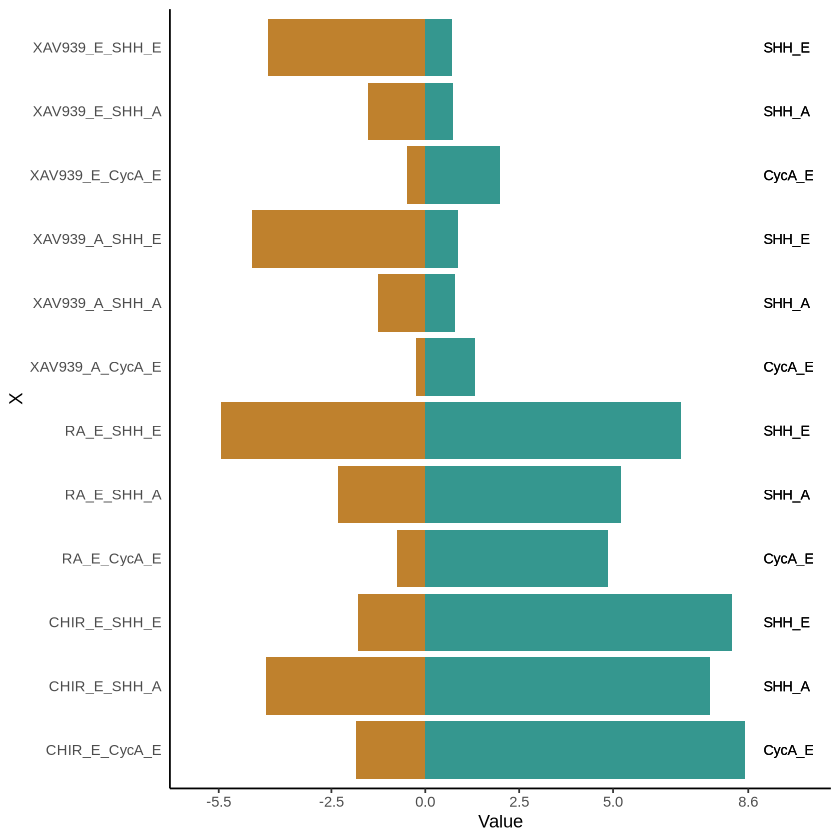

In [157]:

# Plot with custom labels on both sides
melted_df %>%
  ggplot(aes(x = Value, y = X, fill = Morphogen)) +
  geom_bar(stat = "identity") +
  #scale_y_discrete(labels = melted_df$MG1) +  # Custom left-side labels
  geom_text(
    aes(label = MG2, y = X, x = max(Value) + 0.5),  # Specify both y and x for position
    hjust = 0, size = 3,
    inherit.aes = FALSE  # Don't inherit aesthetics from ggplot
  ) +
  coord_cartesian(clip = "off") +  # Allow labels outside plot area
  theme(
    plot.margin = margin(5, 150, 5, 5),  # Add space for right labels
    axis.title.y = element_blank(),  # Optional: Remove y-axis title
  
  )+ theme_classic()+ 

  scale_x_continuous(breaks=c(-5.5, -2.5, 0, 2.5, 5,8.6), limits=c(-6,10) )+
  
theme(
      
      
      axis.ticks.y=element_blank(),
legend.position="none") +
  scale_fill_manual(values = c("#bf812d", "#35978f"))
  
ggsave(paste0(path_fig, 'WTC_distances_div_barplot.pdf'))
       